# Dog Vs. Cat Classification

## Introduction:

The development of deep learning technologies has provided endless opportunities to aid in real world scenarios. This study will delve into an image classification task that aims to build and train a model that can identify between dog and cat images. The dataset of thousands of labeled images would be examined and preprocessed to prepare them for the model. A convolutional neural network would be created and trained, and performance will be compared through validation accuracy and validation loss. Specifically, a Convolutional Neural Network (CNN) is a specialized deep learning algorithm designed for object recognition. This knowledge is significant in situations like when shelters need automated pet organizing or when pet-specific applications are aiming to develop their user experience. This notebook will go through the exploratory data analysis (EDA) procedure, model building and training, discussion, and conclusion. The data is sourced from Kaggle [here.](https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition)

The link to the GitHub notebook can be found [here.](https://github.com/aryanbashar/dog-vs-cat-classification)

## Load in Required Packages:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from zipfile import ZipFile
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

Load in the photos:

In [ ]:
dataset = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# Path to the test dataset
test_dataset = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip'

# Directory to extract test images
test_dir = '/kaggle/working/test'

# Extract test images directly into the test directory
with ZipFile(test_dataset, 'r') as zip:
    # Extract all contents of the zip file
    zip.extractall(test_dir)
    print('Test dataset extracted.')

# List files in test
test_files = os.listdir(test_dir)
print("Files in test directory:", test_files)

# Count the number of files in tesr
file_count = len(test_files)
print('Number of images:', file_count)

Test dataset extracted.
Files in test directory: ['test']
Number of images: 1


Let us check the number of images in the test directory:

In [ ]:
# List files in test
test_subdir = os.path.join(test_dir, 'test')
test_subdir_files = os.listdir(test_subdir)

# Count the number of files in test
file_count = len(test_subdir_files)
print('Number of images:', file_count)

Number of images: 12500


Let us also check the number of images in the train folder:

In [ ]:
# counting the number of files in train folder
path, dirs, files = next(os.walk('/kaggle/working/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
dir_path = '/kaggle/working/train'

cat_count = 0
dog_count= 0
for i in os.listdir(dir_path):
    if i.startswith('cat.'):
        cat_count += 1
    elif i.startswith('dog.'):
        dog_count += 1

print(f"Number of cat images: {cat_count}")
print(f"Number of dog images: {dog_count}")

Number of cat images: 12500
Number of dog images: 12500


There are an equal number of cat or dog images, that is helpful for training the model.

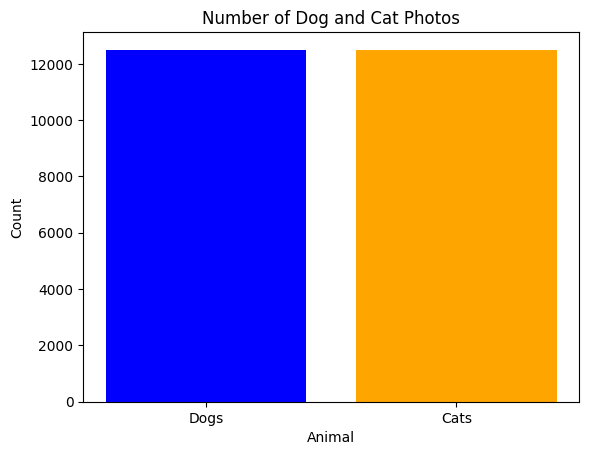

In [ ]:
# Count the number of dog and cat photos
num_dogs = len([file for file in os.listdir(dir_path) if 'dog' in file])
num_cats = len([file for file in os.listdir(dir_path) if 'cat' in file])

# Plotting
labels = ['Dogs', 'Cats']
counts = [num_dogs, num_cats]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Number of Dog and Cat Photos')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.show()

In [ ]:
file_names = os.listdir('/kaggle/working/train')
print(file_names[:10])

['dog.9161.jpg', 'dog.4896.jpg', 'dog.6127.jpg', 'cat.4589.jpg', 'cat.2343.jpg', 'dog.5595.jpg', 'dog.3722.jpg', 'dog.2298.jpg', 'dog.4498.jpg', 'dog.4701.jpg']


Let us check an image of a dog and then a cat to make sure that the images loaded correctly.

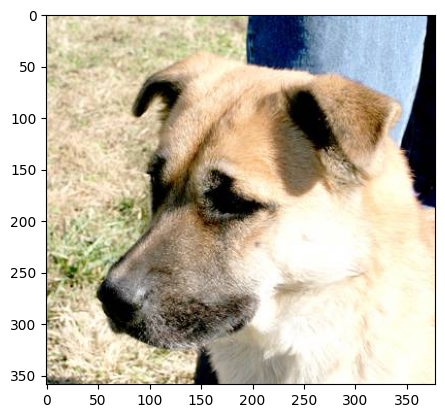

In [ ]:
# Display a dog image
img = mpimg.imread('/kaggle/working/train/dog.1888.jpg')
imgplt = plt.imshow(img)
plt.show()

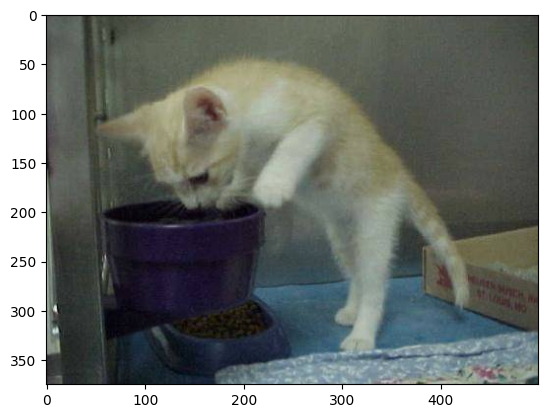

In [ ]:
# Display a cat image
img = mpimg.imread('/kaggle/working/train/cat.11386.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# List all the image files in the directory
image_files = [file for file in os.listdir(dir_path) if file.endswith(('jpg', 'jpeg', 'png'))]

In [ ]:
# Display a random sample of images
num_samples_to_display = 5
sample_images = random.sample(image_files, num_samples_to_display)

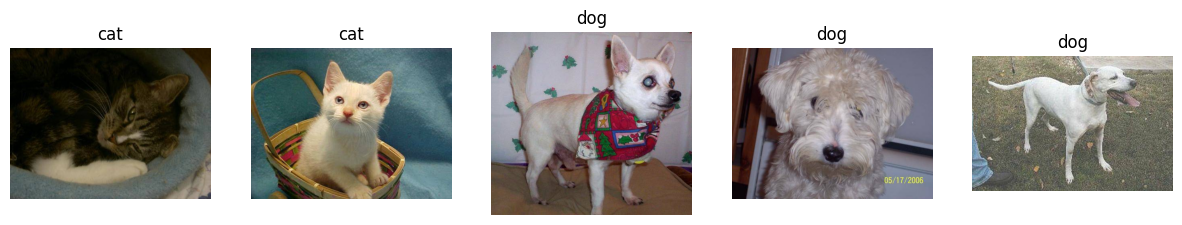

In [ ]:
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(dir_path, image_name)
    img = mpimg.imread(image_path)
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(img)
    plt.title(image_name.split('.')[0])  # Displaying filename without extension
    plt.axis('off')

plt.show()

## Preprocessing:

To ensure that photos are prepared for use with a deep learning model, the below code with set the procedure. The image dimensions are set to (150, 150) as all input data is necessary to be of the same shape. A subset size is set to not overload the computational resources available. Two empty lists are created to host the images and labels and then the loop goes through the images to resize and normalize them. This process turns the image to a numerical array with pixel values of [0, 1]. Then, images and its label are stored in each list.

In [ ]:
# Resize image size
image_size = (150, 150)

# Define the number of samples to use as a subset
subset_size = 1000

# Preprocess images and labels for a subset of the data
X_subset = []
y_subset = []

for file in image_files[:subset_size]:  # Use a subset of the data
    image_path = os.path.join(dir_path, file)
    # Load and resize image
    img = Image.open(image_path)
    img = img.resize(image_size)
    # Convert image to numerical array and normalize pixel values
    img_array = np.array(img) / 255.0  # Normalize pixel values to range [0, 1]
    # Extract label from filename
    label = 1 if 'dog' in file else 0  # Otherwise cat
    X_subset.append(img_array)
    y_subset.append(label)

In [ ]:
# List test image files from the 'test' subdirectory
test_image_files = [file for file in test_subdir_files if file.endswith(('jpg', 'jpeg', 'png'))]

# Define the number of samples to use as a subset for testing
test_subset_size = 1000

# Preprocess a subset of test images
X_test_subset = []
for file in test_image_files[:test_subset_size]:  # Use a subset of the test data
    image_path = os.path.join(test_subdir, file)  # Adjust path to include 'test' subdirectory
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0
    X_test_subset.append(img_array)

# Convert list to numpy array
X_test_subset = np.array(X_test_subset)


Next, the two lists are converted into numpy arrays and shuffled to avoid the model from learning based on the order of the lists. Randomization is helpful for generalization and is a common practice in preparing data for machine learning models.

In [ ]:
# Convert lists to numpy arrays
X_subset = np.array(X_subset)
y_subset = np.array(y_subset)

# Shuffle the subset
indices = np.arange(X_subset.shape[0])
np.random.shuffle(indices)
X_subset = X_subset[indices]
y_subset = y_subset[indices]

The data is then split so that 20% is used to validation and 80% is used for training:

In [ ]:
# Split data into training and validation sets
val_split = 0.2  # 20% of the subset will be used for validation
val_samples = int(val_split * X_subset.shape[0])

X_train_subset = X_subset[:-val_samples]
y_train_subset = y_subset[:-val_samples]
X_val_subset = X_subset[-val_samples:]
y_val_subset = y_subset[-val_samples:]

## First Model Building and Training:

 For the first model, we will use a typical convolutional neural network (CNN) constructed for image classification tasks. It is set up to take features out from images and make predictions, which in this case is the a picture of a dog versus a cat.

* **Convolutional (Conv2D) Layers** – These layers accomplish the convolution operation by applying filters to the input to create feature maps. The filters are important in capturing patterns and complex features. The Rectified Linear Unit (ReLU) is used to establish non-linearity and for its efficiency.  
* **Max Pooling2D Layers** – These layers are important in reducing the spatial dimensions of the input volume and helps with computational load and memory usage.
* **Flatten Layer** – Changes the 3D output into a 1D tensor required by the fully connected layers.
* **Dense Layers** – These layers process the features that are taken by the convolutions and pooling,
* **Output Layer** – This is the final layer that is a single neuron with a sigmoid activation function, important for binary classification. It puts out a probability of the input being a dog or a cat.

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=32, validation_data=(X_val_subset, y_val_subset))

2024-03-31 19:17:10.264301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 19:17:10.264400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 19:17:10.391287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
 5/25 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5227 - loss: 0.6897

I0000 00:00:1711912650.733013      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711912650.751869      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4931 - loss: 0.6920

W0000 00:00:1711912651.969935      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.4929 - loss: 0.6921 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 2/10
 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5697 - loss: 0.6845

W0000 00:00:1711912653.059117      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5491 - loss: 0.6876 - val_accuracy: 0.4550 - val_loss: 0.6954
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5466 - loss: 0.6859 - val_accuracy: 0.4550 - val_loss: 0.7062
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5742 - loss: 0.6730 - val_accuracy: 0.6150 - val_loss: 0.6618
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6233 - loss: 0.6516 - val_accuracy: 0.6600 - val_loss: 0.6405
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6470 - loss: 0.6415 - val_accuracy: 0.6300 - val_loss: 0.6446
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6777 - loss: 0.6134 - val_accuracy: 0.6500 - val_loss: 0.6293
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7265 - loss: 0.5752 - val_accuracy: 0.6250 - val_loss: 0.6370
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6852 - loss: 0.5771 - val_accuracy: 0.6550 - val_loss: 0.

The performance of the model can be measured through Validation Loss and Validation Accuracy:

In [ ]:
# Evaluate the model on the validation data subset
val_loss, val_accuracy = model.evaluate(X_val_subset, y_val_subset)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6084 - loss: 0.6343 
Validation Loss: 0.6063842177391052
Validation Accuracy: 0.6399999856948853


Generally, you want to have a lower validation loss and a higher validation accuracy. A loss of 0.606 means that the model is off quite a bit from the actual labels. Also, the model is only accurate 64% of the time, which only improved a bit from random guessing at 50%. Let us try a different model to see if performance can be improved.

## Second Model and Tuning:

The initial custom CNN model could be compared instead with a model VGG-16 that is trained on the ImageNet dataset. It is also a CNN architecture and consists of 16 layers of which 13 are convolutional layers and 3 are fully connected layers. VGG-16 is known for its simplicity and is known to achieve outstanding results for image classification and object recognition. The design of the model allows it to learn specific representations within visual features that improves its accuracy.

On top of that, a flatten layer was added to convert the feature maps to a single vector. A Dense layer was included to help with learning non-linear relationships in the inputs. A Dropout layer is added to reduce the impact of overfitting. The last Dense layer is there to measure the probability that the image would be a dog compared to a cat.

In [ ]:
# Load the VGG-16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add a custom classification head
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the new model
model_vgg = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(X_train_subset, y_train_subset, epochs=10, batch_size=32, validation_data=(X_val_subset, y_val_subset))

# Evaluate the model
val_loss_vgg, val_accuracy_vgg = model_vgg.evaluate(X_val_subset, y_val_subset)
print('Validation Loss (VGG16):', val_loss_vgg)
print('Validation Accuracy (VGG16):', val_accuracy_vgg)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
 3/25 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4219 - loss: 0.8157

W0000 00:00:1711912679.968814      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5995 - loss: 0.6542

W0000 00:00:1711912682.350705      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 335ms/step - accuracy: 0.6037 - loss: 0.6495 - val_accuracy: 0.8050 - val_loss: 0.4552
Epoch 2/10


W0000 00:00:1711912688.030421      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.8989 - loss: 0.2948 - val_accuracy: 0.7950 - val_loss: 0.4434
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9052 - loss: 0.2487 - val_accuracy: 0.8350 - val_loss: 0.3966
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9506 - loss: 0.1608 - val_accuracy: 0.8500 - val_loss: 0.3934
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9559 - loss: 0.1595 - val_accuracy: 0.8250 - val_loss: 0.4086
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9640 - loss: 0.1215 - val_accuracy: 0.8600 - val_loss: 0.3780
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9582 - loss: 0.1247 - val_accuracy: 0.8500 - val_loss: 0.3719
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9765 - loss: 0.0907 - val_accuracy: 0.8650 - val_loss: 0.3629
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9890 - loss: 0.0691 - val_accuracy: 0.8600 - val_loss: 0

In [ ]:
# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Custom CNN', 'VGG16'],
    'Validation Accuracy': [val_accuracy, val_accuracy_vgg],
    'Validation Loss': [val_loss, val_loss_vgg]
})
print(summary_table)

        Model  Validation Accuracy  Validation Loss
0  Custom CNN                 0.64         0.606384
1       VGG16                 0.87         0.359857


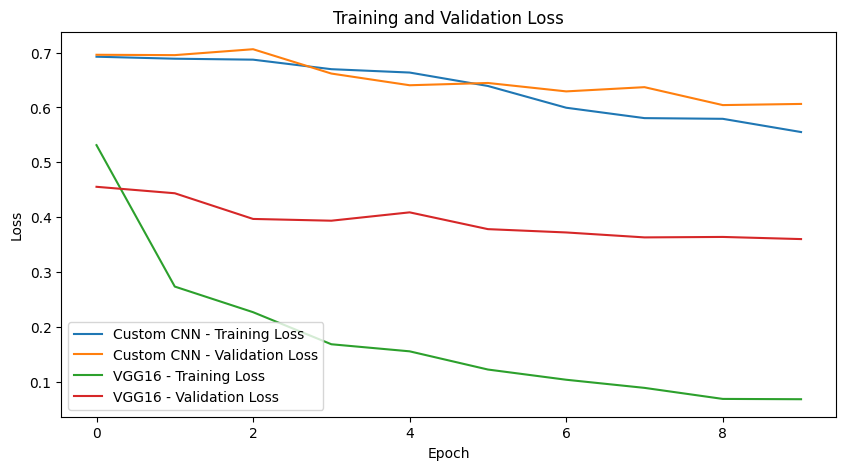

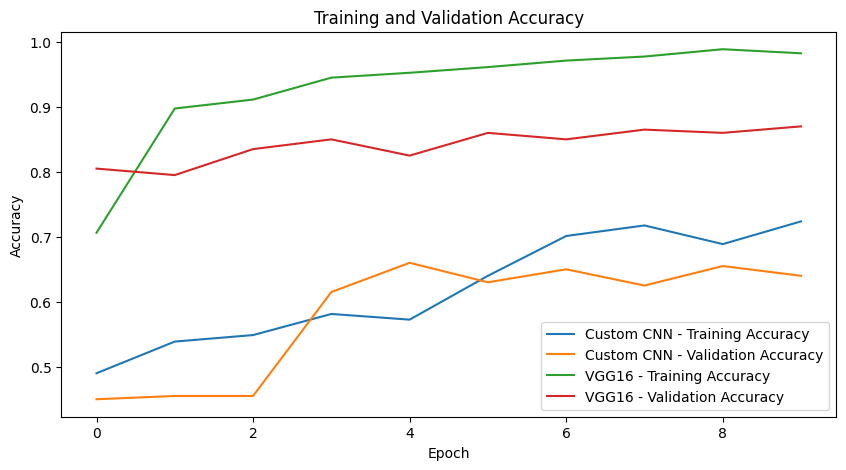

In [ ]:
# Plot training/validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Custom CNN - Training Loss')
plt.plot(history.history['val_loss'], label='Custom CNN - Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG16 - Training Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training/validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Custom CNN - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Custom CNN - Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG16 - Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## Discussion:

The VGG-16 model exceedingly outperformed the custom CNN model with a validation accuracy of about 0.870 and a validation loss of about 0.360. This can be due to multiple factors, but especially due to the complexity of the architecture. It is an extensive model with 16 layers and 4 other layers that were added on top. This amount of depth is significantly important for learning of a multitude of features like simple boundaries to complex pieces. To add on to this, VGG-16 is known for its ability to perform well in image recognition tasks and is set up perfectly to capture patterns in the data in an ordered fashion.

The benefits of a pre-trained model are evident here, as VGG-16 had thousands of images to train. Even though it may not all have been dogs and cat, the many features identified and learned from can be transferred to many different classification tasks. Also, since the initial layers are trained to start, the model would need less training epochs to get to high accuracy. From the training and validation accuracy plot, it is seen that the VGG-16 model has a high accuracy right from the start and goes up a bit over time. Also, the two accuracies stay close by which means that the model as achieved beneficial generalization. The custom CNN instead sees training accuracy gradually go higher than validation accuracy, which could mean that the model is overfitting to the training data. A similar case can be seen with the training and validation loss plot, where VGG-16 had a stark drop in training loss near the beginning and gradually decreases over the epochs. Convergence looks to have occurred and there looks to be a lack of overfitting.


## Limitations and Future Steps:



1.   **Further Tuning of the Models:**
  - The initial layers could be unfrozen to allow for further training and to pick up more specific features in this dataset.
2.   **Compare Other Advanced Architectures:**
  - The benefit of this field is the vast amount of newer and more robust CNN architectures that are available for public use. These can be further compared to see if accuracy can be improved.
3. **Regularization:**
  - A system of further regularization would have helped the created custom CNN to avoid overfitting to the training data and help with performance on unseen data.
4. **Computing Power:**
 - Due to being limited processing and computing power, only a subset of the data could be used. The full dataset could have provided significantly more data for the model to learn from.  



## Conclusion:

To conclude, this image classification study provided an opportunity to delve into CNNs, along with demonstration of the strength of transfer learning. This notebook went through the EDA procedure, model building and training, discussion, and future steps. Using the pre-trained VGG-16 architecture, we were able to achieve excellent accuracy and avoid overfitting. Future steps can be taken to further tune the hyperparameters, introduce more computing power, and include newer models that can take advantage of the large number of photos.  This will set the stage for using the refined model in many applications like pet identification, moderating content online, wildlife cameras and more.  

## References:

O’Shea, K., & Nash, R. (2015). An introduction to convolutional neural networks. *arXiv (Cornell University).* https://arxiv.org/pdf/1511.08458.pdf

Simonyan, K., & Zisserman, A. (2014, September 4). *Very deep convolutional networks for Large-Scale image recognition.* arXiv.org. https://arxiv.org/abs/1409.1556

Will Cukierski. (2016). *Dogs vs. Cats Redux: Kernels Edition.* Kaggle. https://kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition